In [1]:
from numba import jit, autojit
from osgeo import gdal
import numpy as np
import pandas as pd
import os
from tqdm import tnrange, tqdm_notebook


In [2]:
def waveformC(raster):
    # Define constants
    cumpowr=np.zeros((544,1))   # Signal length
    # Define spatial wieghting 
    x, y = np.r_[-50:50:0.5], np.r_[-50:50:0.5]
    X, Y = np.meshgrid(x,y)
    w=np.exp(-(X**2 + Y**2)/2/17.5**2)
    # Conversion to nanoseconds... 'D' is nanoseconds
    Z = raster[:,:] - np.max(raster[:,:])
    D = (abs(Z) / 0.15) + 10    # Start all recordings after 10 ns
    for i in range(200):
        for j in range(200):
            ibin=np.int(D[i,j]) #finding ibin
            #add power within pixel (i,j)-which is w(i,j) to the returned
            #power in the bin number ibin
            cumpowr[ibin]=cumpowr[ibin]+w[i,j]
    return cumpowr

In [5]:
# store = pd.HDFStore('/Users/sgrigsby/Desktop/April_20th_wfs.h5','a')
store = pd.HDFStore('/Users/sgrigsby/Desktop/April_20th_wfs.h5','r')
April_20th_wf_no_conv = store['raw'] 

In [16]:
store.close()

In [17]:
April_20th_wf_no_conv[April_20th_wf_no_conv == 0] = np.nan

In [19]:
April_20th_wf_no_conv.dropna(how='all')

,0,1,2,3,4,5,6,7,8,9,...,534,535,536,537,538,539,540,541,542,543
0000a611a21ce4b4d7a46384354d97ee836d781602a95da52c4d5a4ddd00604e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0000b94d158535a8883dd5826c98c5b993733f236864ee59cc98bdaf0e1bc0bf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0000ff807be2400f03fd982ff5d87c18cf648a28394e30b53ee5117ee01618c9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0001124b073d4658d88ff1cda8ada4da25931521bb9e5acd40b0ccbfeafbbc16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0001640dd80d38a1a4cb53c0f9a197749825048ea7409e2c4d4f041b979e545f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0001e095a5c0be8eeb5725ac2e4b6c5d4787de92598be49a3172b3fdf3d62c5c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0002a4d85869396e56813085a2b63790b0486bfac835e2a97ba9456aa536c507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0002a8d35f3d95d0a87001079274d23b5d2d4f53354c0f53673a446490372ea5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0002c6a659488b3e3238cf338d92dba509c5b9230074a6ce377bb31f12731fde,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0003122d425f6d00141dd85146f5f724647037cc00a703f052a4d58a346e85c7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
April_20th_wf_no_conv[April_20th_wf_no_conv.ix[:,543]>0][70:80]

,0,1,2,3,4,5,6,7,8,9,...,534,535,536,537,538,539,540,541,542,543
0bb81f428b10f163576d4091a22288b7ab62307b083d17bc37b6ec031d4c2cde,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.531343,0.597738,0.630603,0.507280,0.505983,0.627058,0.423400,0.486180,0.583644,0.410695
0c73d4a4a7d9683d15562dc6f1264e455cf3736775dec3d48f27dec537169a3d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.162633,8.984311,8.294090,13.956646,9.548693,10.179684,8.427302,11.688278,7.438523,12.045216
0c8134e0b10e5f81303fe2dce60c0a35c625ed111e823496517a5582e740217f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.694668,33.140825,22.517298,22.069933,30.688052,24.201233,33.061612,30.053136,29.427133,26.299078
0c9fab0aaa5c54334042ab9fadfddfbe41a00286ac2d50d41c82a6dfaf8448c4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.030747,0.030250,0.026878,0.028802,0.031248,0.022800,0.035403,0.020745,0.029358,0.018851
0ca7b62438a7db5666d462b5286724b1e53d6cdc8b00daeb19daa7f622c5ccc2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.170156,0.145910,0.124109,0.113180,0.095038,0.108213,0.083390,0.066882,0.067752,0.042370
0cacfb8fca0fe4a0b5fdd223a3403b129cdf9b4a586a33ff6bf1f65344066e66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.264131,0.275289,0.238952,0.245879,0.202349,0.148920,0.173083,0.169263,0.167750,0.133806
0cc0cf72ec847bbdbc742d85d27329052c7cce4a99683d6303617beafb8e4269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.253542,13.888216,16.098581,15.170705,16.977808,16.824033,15.870802,12.401315,14.818164,17.507188
0da6fc28e734dbe0b4588b7f4a885004745f8ccfae4d3a6c35539bde230befc8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.297543,14.845275,13.451700,13.488472,13.247011,14.181600,13.605082,12.621712,12.328579,12.878272
0dd060cd243fa8f00c3a891bf3b2c7f04643bdba4cf9ddcddb6a67b49eba15f3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.586737,0.904221,1.289179,1.367238,0.901645,1.112230,1.025057,1.113124,0.813348,1.034815
0dd1141e8a2fd54c7546895e5adec2bc5c6df85e97ab2405e09cb605c5e2c581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.029251,0.028082,0.021416,0.021706,0.021267,0.021475,0.018737,0.016623,0.016080,0.012796


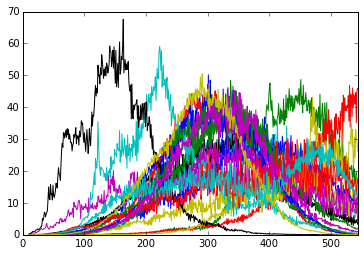

In [55]:
April_20th_wf_no_conv[April_20th_wf_no_conv.ix[:,543]>0][60:80].T.plot(legend=False)

In [106]:
tempidx = np.nanmax(April_20th_wf_no_conv[April_20th_wf_no_conv.ix[:,543]>0].as_matrix(),axis=1) > 50

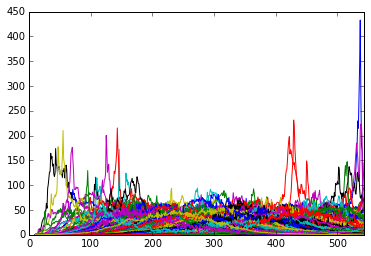

In [107]:
April_20th_wf_no_conv[April_20th_wf_no_conv.ix[:,543]>0][tempidx].T.plot(legend=False)

In [108]:
April_20th_wf_no_conv[April_20th_wf_no_conv.ix[:,543]>0][tempidx]

,0,1,2,3,4,5,6,7,8,9,...,534,535,536,537,538,539,540,541,542,543
00038e8b92afe6d2fbc1ff5dd1df4b0db7520ad9e2a7d617671197182a8f0e37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.074558,0.072066,0.058416,0.056728,0.048063,0.051841,0.044575,0.037733,0.033482,0.037598
0011cb9d0a2d72302d5002fe095aeedb5c4193c00bc3d93fea6184eef1c3300d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.417313,8.563384,10.229077,12.620252,6.654046,6.090276,3.832147,4.492739,4.552237,4.045264
00ca4e763b82b4933a62276081bbf212e161a7ae64e97aa13ba851ab0d5b544d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.022872,0.030813,0.030540,0.024636,0.016235,0.024965,0.012626,0.012965,0.014513,0.006789
011f7fa4b2f350a81c98a2bc1cc5440c9728dd7908443838e5dab7c2071082c1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.316784,1.406043,1.027004,1.209526,1.041328,1.069814,0.972376,0.968980,0.935470,0.791122
017faf76426f4ce7e7b4d492bbf9a7c4889c02fe99efec0f5e5c74f44cd9d9ff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.797287,0.943571,0.734073,0.689924,0.705980,0.693519,0.604058,0.644842,0.645886,0.515922
01de26f996d6a4e1d91f7ab50ecff3c2b4e3b3ec8243a58cda87bd11871741c2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.110664,0.082433,0.082774,0.093311,0.086455,0.093592,0.077857,0.073234,0.072279,0.075151
021d5038aeb9241bfed72ae11e4f20c08573c60bfa03c9985a90fac269428f04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.002446,0.000581,0.001740,0.003488,NaN,0.001073,0.001113,0.002159,0.000497,0.001534
02311992fb217ec5c85a5a58b5768c39faed96d900a17fe28b5fc766c9adf2bc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.009318,0.008063,0.006166,0.007290,0.005418,0.005168,0.003130,0.005229,0.003767,0.003029
035526edf30e3ff8d662993fc68f2d950cb7078530e3e4bd8006d7ec48323b7b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.017850,0.013018,0.011284,0.007119,0.005215,0.003787,0.001737,0.001668,0.001573,0.001089
0389dba3accbd3238863cf0603552bcd2cd7dc5d0aad4f47729879421cab8585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.536393,0.349381,0.432894,0.364332,0.504880,0.476530,0.533413,0.263968,0.160226,0.190346


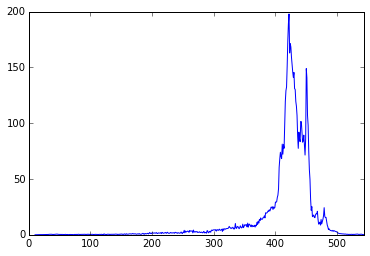

In [134]:
April_20th_wf_no_conv.ix["0389dba3accbd3238863cf0603552bcd2cd7dc5d0aad4f47729879421cab8585"].plot()

<matplotlib.colorbar.Colorbar instance at 0x19c55b1b8>

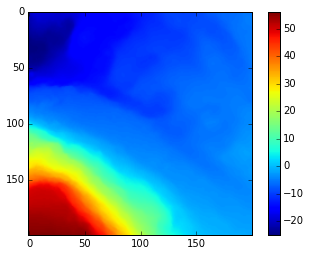

In [135]:
source = gdal.Open(folder + "0389dba3accbd3238863cf0603552bcd2cd7dc5d0aad4f47729879421cab8585" + '.tif')
imshow(source.ReadAsArray())
colorbar()

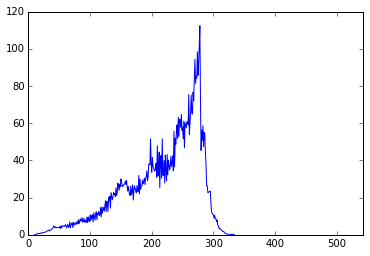

In [188]:
April_20th_wf_no_conv.ix[idx[184945]].plot()

<matplotlib.colorbar.Colorbar instance at 0x1e7d0a488>

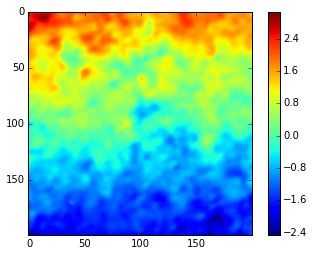

In [249]:
source = gdal.Open(folder + idx[184946] + '.tif')
imshow(source.ReadAsArray())
colorbar()

In [3]:
wave_numba = autojit(waveformC)

In [37]:
folder = "/Users/sgrigsby/output/"

In [137]:
idx = []
for i, filename in enumerate(tqdm_notebook(os.listdir(folder))):
    fn, ext = os.path.splitext(filename)
    idx.append(fn)

In [7]:
idx[1802]

'0265b1b526f95417d519cd235630580de4fc72c771ac99a96fea22306ae3d5e1'

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
(source.RasterYSize & source.RasterXSize) == 200

True

<matplotlib.colorbar.Colorbar instance at 0x1126ef9e0>

/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


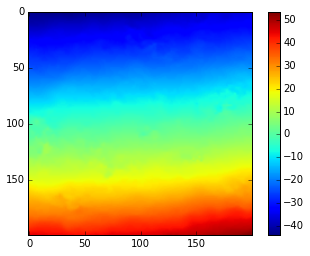

In [9]:
source = gdal.Open(folder + idx[1802] + '.tif')
imshow(source.ReadAsArray())
colorbar()

<matplotlib.colorbar.Colorbar instance at 0x10f694950>

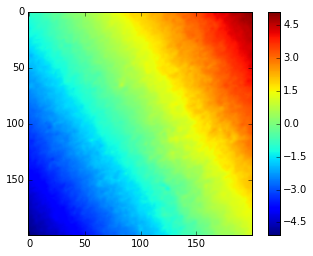

In [9]:
source = gdal.Open(folder + idx[2492] + '.tif')
imshow(source.ReadAsArray())
colorbar()

In [10]:
(source.RasterYSize & source.RasterXSize) == 200

True

In [14]:
raster = source.ReadAsArray()

In [15]:
Z = raster[:,:] - np.max(raster[:,:])

In [23]:
np.isfinite(raster).sum()

29600

In [26]:
raster.shape

(148, 200)

In [24]:
len(raster)

148

(array([ 1382.,  2250.,  2414.,  3114.,  3534.,  3604.,  4200.,  4000.,
         3155.,  1947.]),
 array([-18.20526123, -16.38473511, -14.56420898, -12.74368286,
        -10.92315674,  -9.10263062,  -7.28210449,  -5.46157837,
         -3.64105225,  -1.82052612,   0.        ]),
 <a list of 10 Patch objects>)

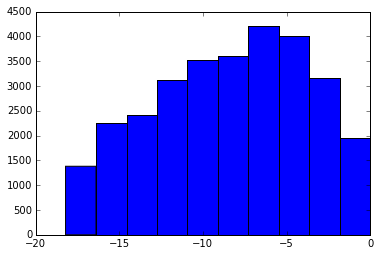

In [22]:
hist(Z.ravel())

In [13]:
min(source.ReadAsArray().ravel())

-9.7996826

In [ ]:
source = gdal.Open(folder + idx[2493] + '.tif')
wave_numba(source.ReadAsArray()).ravel()

In [6]:
April_20th_wf_no_conv = pd.DataFrame(index=idx,columns=np.r_[0:544:1])

In [15]:
space = np.zeros((len(idx),544),dtype=float)

In [12]:
%%timeit
source = gdal.Open(folder + '0000a611a21ce4b4d7a46384354d97ee836d781602a95da52c4d5a4ddd00604e.tif')
wave_numba(source.ReadAsArray()).ravel()

1 loop, best of 3: 218 ms per loop


In [16]:
%%timeit
source = gdal.Open(folder + '0000a611a21ce4b4d7a46384354d97ee836d781602a95da52c4d5a4ddd00604e.tif')
space[0,:] = wave_numba(source.ReadAsArray()).ravel()

1 loop, best of 3: 212 ms per loop


In [8]:
%%timeit
source = gdal.Open(folder + '0000a611a21ce4b4d7a46384354d97ee836d781602a95da52c4d5a4ddd00604e.tif')
April_20th_wf_no_conv.iloc[0] = wave_numba(source.ReadAsArray()).ravel()

1 loop, best of 3: 6.92 s per loop


In [ ]:
for i, filename in enumerate(tqdm_notebook(os.listdir(folder))):
    #fn, ext = os.path.splitext(filename)
    source = gdal.Open(folder + filename)
    space[i,:] = wave_numba(source.ReadAsArray()).ravel()

In [ ]:
# store = pd.HDFStore('/Users/sgrigsby/Desktop/April_20th_wfs.h5','a')
store = pd.HDFStore('/Users/sgrigsby/Desktop/April_20th_wfs.h5','a')
store['raw'] = April_20th_wf_no_conv
store.close()

In [1]:
print(8)

8


In [ ]:
def fill_array_raw(i, filename):
    source = gdal.Open(folder + filename)
    space[i,:] = wave_numba(source.ReadAsArray()).ravel()

[sqrt(i ** 2) for i in range(10)]
Parallel(n_jobs=2)(delayed(sqrt)(i ** 2) for i in range(10))